In [19]:
import numpy as np
import seaborn as sns

from collections import Counter
import operator
from sklearn. metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [20]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
    X = df.drop(["species"], axis=1)
    y = df["species"]

    display(X , y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [22]:
class KMeans:
    def __init__(self,no_of_clusters=3,max_iteration=55):
        self.no_of_clusters = no_of_clusters
        self.max_iteration = max_iteration
        self.centroids = None

    def fit_predict(self,X):
        
       
        X = np.array(X)  
        random_index = random.sample(range(0,X.shape[0]), self.no_of_clusters) #range and no of centroids index

        self.centroids = X[random_index]
        print(random_index,X[random_index])
    
        for i in range(self.max_iteration):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            
            old_centroids = self.centroids
            
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            
            # check finish
            if (old_centroids == self.centroids).all():
                break

            

        return self.centroids

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
            #each loop is a array of 4
                
                #eucledian distance
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
                
            #print(distances)
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        
            
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [23]:

classifier = KMeans(no_of_clusters=3, max_iteration=55)
classifier.fit_predict(X)
# returns centrio positions


[10, 86, 137] [[5.4 3.7 1.5 0.2]
 [6.7 3.1 4.7 1.5]
 [6.4 3.1 5.5 1.8]]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

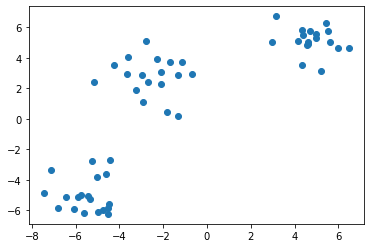

In [25]:

centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]
X,y = make_blobs(n_samples = 55, cluster_std = cluster_std, centers = centroids,  n_features = 2, random_state = 2)

plt.scatter(X[:,0],X[:,1])

In [ ]:
# https://youtu.be/MFraC1JObUo
# Some of the reference was taken from here.